# 1D CNN Model ( 3 Convolution Layer)

In [242]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend

import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
from tensorflow.keras.utils import to_categorical

In [243]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [245]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [295]:
features = pd.read_csv("F:/HAR/PAMAP2_Dataset/pamap_features.csv", index_col=0)

In [419]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.211600,-58.489100,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.298300,-58.484500,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.721700,-58.360800,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.541200,-59.001300,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,94.66,24,162.0,25.125,4.78601,6.75444,7.05521,4.71052,6.72462,6.64876,...,0.020064,-0.022287,-46.0304,-1.464080,-0.453931,0.522578,-0.295758,0.700086,-0.386418,9
2871986,94.77,24,162.0,25.125,4.34732,6.90337,6.35537,4.39582,6.96850,6.61834,...,-0.004692,0.009044,-45.5269,-0.843791,0.114449,0.522768,-0.293886,0.701447,-0.385119,9
2871997,94.88,24,162.0,25.125,4.70704,6.59291,5.89995,4.70308,6.48243,5.99996,...,-0.020501,-0.036864,-45.6476,-1.094840,0.256148,0.522624,-0.294082,0.703224,-0.381912,9
2872007,94.98,24,162.0,25.125,4.81452,6.51482,5.74788,4.89736,6.49594,5.78832,...,-0.011895,-0.017897,-45.9167,-0.437698,0.254439,0.523382,-0.292121,0.704582,-0.379869,9


In [ ]:
label = LabelEncoder()
features['activityID'] = label.fit_transform(balanced_data['activityID'])
features.head()

In [420]:
features['activityID'].value_counts()

17    21696
4     20998
1     17575
3     17256
2     16881
7     16857
16    15997
6     14933
12    10699
13     9585
5      8665
24     4356
Name: activityID, dtype: int64

<AxesSubplot:xlabel='activityID', ylabel='count'>

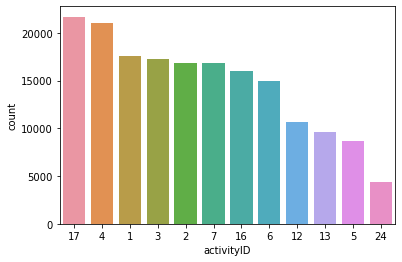

In [421]:
sns.countplot(x = "activityID", data = features, order = features.activityID.value_counts().index)

In [422]:
indexes = features[features['activityID'] == 0].index
features.drop(indexes , inplace=True)

In [423]:
features['activityID'].value_counts()

17    21696
4     20998
1     17575
3     17256
2     16881
7     16857
16    15997
6     14933
12    10699
13     9585
5      8665
24     4356
Name: activityID, dtype: int64

In [424]:

from sklearn.preprocessing import StandardScaler

X = features[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']]
y= features['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3'])
scaled_X['label'] = y.values

In [425]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [426]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)



X_train, y_train = create_dataset(X_train[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

<ipython-input-426-e503db729593>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


(8773, 1, 36) (8773, 1)


In [429]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [398]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (8773, 1, 36)
X_test.shape  (166723, 1, 36)
y_train.shape  (8773, 12)
y_test.shape  (166723, 12)


In [399]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [427]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [400]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [428]:
n_timesteps, n_features, n_outputs

(1, 36, 1)

In [431]:
# Training and evaluating the model

model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train.shape[1], X_train.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [433]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [435]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/10
247/247 [==============================] - 1s 5ms/step - loss: 0.1435 - accuracy: 0.9536 - val_loss: 0.3394 - val_accuracy: 0.9055
Epoch 2/10
247/247 [==============================] - 1s 5ms/step - loss: 0.1427 - accuracy: 0.9500 - val_loss: 0.3343 - val_accuracy: 0.9066
Epoch 3/10
247/247 [==============================] - 1s 5ms/step - loss: 0.1408 - accuracy: 0.9534 - val_loss: 0.3354 - val_accuracy: 0.9032
Epoch 4/10
247/247 [==============================] - 1s 5ms/step - loss: 0.1354 - accuracy: 0.9562 - val_loss: 0.3447 - val_accuracy: 0.8998
Epoch 5/10
247/247 [==============================] - 1s 5ms/step - loss: 0.1304 - accuracy: 0.9583 - val_loss: 0.3310 - val_accuracy: 0.9077
Epoch 6/10
247/247 [==============================] - 1s 5ms/step - loss: 0.1254 - accuracy: 0.9563 - val_loss: 0.3611 - val_accuracy: 0.9055
Epoch 7/10
247/247 [==============================] - 1s 5ms/step - loss: 0.1313 - accuracy: 0.9552 - val_loss: 0.3350 - val_accuracy: 0.9112
Epoch 

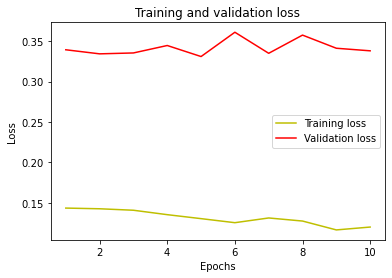

In [453]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

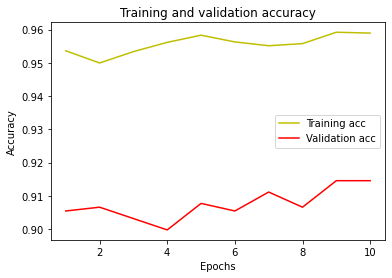

In [437]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [438]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [439]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

5211/5211 [==============================] - 9s 2ms/step - loss: 0.3615 - accuracy: 0.9074
Accuracy >90.737933
Base Loss >0.36


In [456]:
print(accuracy_score(y_test,y_pred_class))
print(classification_report(y_test,y_pred_class))

0.9073793057946414
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16637
           1       0.97      0.96      0.96     16062
           2       0.92      0.97      0.95     16428
           3       0.87      0.91      0.89     19952
           4       0.96      0.94      0.95      8196
           5       0.92      0.96      0.94     14209
           6       0.88      0.92      0.90     16025
           7       0.77      0.76      0.76     10196
           8       0.85      0.65      0.73      9102
           9       0.85      0.84      0.84     15172
          10       0.96      0.95      0.96     20609
          11       0.87      0.84      0.85      4135

    accuracy                           0.91    166723
   macro avg       0.90      0.89      0.89    166723
weighted avg       0.91      0.91      0.91    166723



In [457]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [458]:
predict_x = model.predict(X_test) 
y_pred_class= np.argmax(predict_x,axis=1)

5211/5211 [==============================] - 8s 1ms/step


In [465]:
label.classes_

array(['BSC', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'JOG', 'JUM', 'SBE',
       'SBW', 'SCH', 'SDL', 'SIT', 'SLH', 'SLW', 'SRH', 'STD', 'STN',
       'STU', 'WAL'], dtype=object)

In [462]:
mat = confusion_matrix(y_test, y_pred_class)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

NameError: name 'activityID' is not defined